In [33]:
import logging
import os

import numpy as np
import pandas as pd
import torch

import pyro
import pyro.distributions as dist
import pyro.poutine as poutine

from pyro.distributions import constraints
from pyro.infer.inspect import get_dependencies, get_model_relations, render_model
from pyro.ops.provenance import ProvenanceTensor, detach_provenance, get_provenance

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### MLE Model - 1

In [43]:
def model_mle_1(data):
    mu = pyro.param('mu', torch.tensor(0.),constraint=constraints.unit_interval)
    sd = pyro.param('sd', torch.tensor(1.),constraint=constraints.greater_than_eq(0))
    with pyro.plate('plate_data', len(data)):
        pyro.sample('obs', dist.Normal(mu, sd), obs=data)

In [44]:
data = torch.tensor([1.,2.,3.])
get_model_relations(model_mle_1,model_args=(data,))

{'sample_sample': {'obs': []},
 'sample_param': {'obs': ['sd', 'mu']},
 'sample_dist': {'obs': 'Normal'},
 'param_constraint': {'mu': Interval(lower_bound=0.0, upper_bound=1.0),
  'sd': GreaterThanEq(lower_bound=0)},
 'plate_sample': {'plate_data': ['obs']},
 'observed': ['obs']}

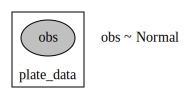

In [45]:
render_model(model_mle_1,model_args=(data,),render_distributions=True)

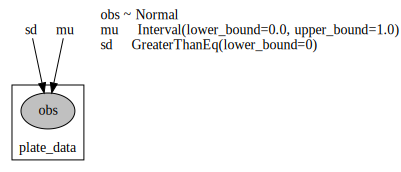

In [46]:
render_model(model_mle_1,model_args=(data,),render_distributions=True,render_params=True)

### MAP Model - 1

In [20]:
def model_map_1(data):
    
    k1 = pyro.param('k1',torch.tensor(1.))
    mu = pyro.sample('mu', dist.Normal(0, k1))
    sd = pyro.sample('sd', dist.LogNormal(mu, k1))
    
    with pyro.plate('plate_data', len(data)):
        pyro.sample('obs', dist.Normal(mu, sd), obs=data)


In [47]:
data = torch.tensor([1.,2.,3.])
get_model_relations(model_map_1,model_args=(data,))

{'sample_sample': {'mu': [], 'sd': ['mu'], 'obs': ['sd', 'mu']},
 'sample_param': {'mu': ['k1'], 'sd': ['k1'], 'obs': []},
 'sample_dist': {'mu': 'Normal', 'sd': 'LogNormal', 'obs': 'Normal'},
 'param_constraint': {'k1': Real()},
 'plate_sample': {'plate_data': ['obs']},
 'observed': ['obs']}

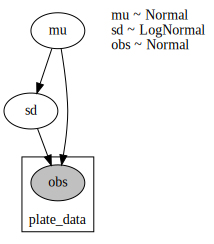

In [48]:
render_model(model_map_1,model_args=(data,),render_distributions=True)

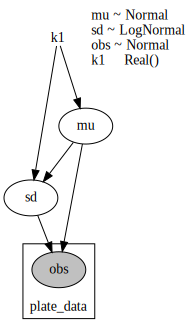

In [49]:
render_model(model_map_1,model_args=(data,),render_distributions=True,render_params=True)

### MAP Model - 2

In [52]:
def model_map_2(data):
    
    t = pyro.param('t',torch.tensor(1.),constraints.integer)
    a = pyro.sample('a', dist.Bernoulli(t))
    b =  pyro.param('b',torch.tensor(2.))
    with pyro.plate('plate_data', len(data)):
        pyro.sample('obs', dist.Beta(a, b), obs=data)

In [53]:
data = torch.tensor([1.,2.,3.])
get_model_relations(model_map_2,model_args=(data,))

{'sample_sample': {'a': [], 'obs': ['a']},
 'sample_param': {'a': ['t'], 'obs': ['b']},
 'sample_dist': {'a': 'Bernoulli', 'obs': 'Beta'},
 'param_constraint': {'t': Integer, 'b': Real()},
 'plate_sample': {'plate_data': ['obs']},
 'observed': ['obs']}

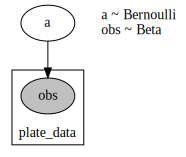

In [54]:
render_model(model_map_2,model_args=(data,),render_distributions=True)

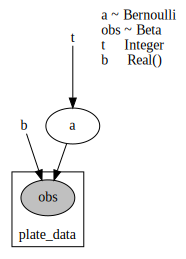

In [55]:
render_model(model_map_2,model_args=(data,),render_distributions=True,render_params=True)